In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./dataset_diary/NIKL_NP.csv')

In [3]:
# 2. 빈 문자열과 공백만 있는 문자열을 NaN으로 대체
df['sentence'] = df['sentence'].replace(r'^\s*$', pd.NA, regex=True)  # 빈 문자열 및 공백만 있는 문자열을 NaN으로 대체

# 3. NaN이 있는 행 제거
df_clean = df.dropna(subset=['sentence'])  # 'sentence' 열에서 NaN 값이 있는 행만 제거

In [4]:
# 3. author_id와 title을 기준으로 groupby 후 sentence 합치기
df_merged = df_clean.groupby(['author_id', 'title'], as_index=False).agg({
    'sentence': '\n'.join,  # 문장들을 줄바꿈으로 이어붙임
    'file_id': 'first',
    'anno_level': 'first',
    'category': 'first',
    'author_age': 'first',
    'author_occupation': 'first',
    'author_sex': 'first',
    'author_submission': 'first',
    'author_handwriting': 'first',
    'text_date': 'first',
    'text_subclass': 'first'
})

In [39]:
# 4. 결과 확인
print(df_merged.head())

  author_id       title                                           sentence  \
0    P00013     아내의 생일상  어제는 아내의 생일이었다. 생일을 맞이하여 아침을 준비하겠다고 오전 8시 30분부터...   
1    P00013   와이프는 씽씽씽~  오랜만에 와이프가 운전하는 차를 탔다. 코로나의 영향인지 도로가 한산하다. 그래서인...   
2    P00013  코로나 서울 지하철  오늘은 4호선을 타고 명동을 지나갔다. 명동역에서 여행용 가방이 이끄는 중국인 두 ...   
3    P00015      견우와 직녀  견우와직녀가살았는대 해어져서 칠월칠석 때마다 비가네려서 마을이 잠겹는데 암잠겹으면 ...   
4    P00015         고양이  고양이가 꾀를내어서 셋째아들이 고양이떼문에 부자가돼었는데 그렇게 해준 고양이가 자랑...   

          file_id anno_level    category  author_age author_occupation  \
0  WDRW1900100013         원시   비출판물 > 수필          45           직장인/전문직   
1  WDRW1900200013         원시   비출판물 > 수필          44           직장인/전문직   
2  WDRW1900300013         원시   비출판물 > 수필          45           직장인/전문직   
3  WDRW1901700015         원시  비출판물 > 감상문           7              초등학생   
4  WDRW1901000015         원시  비출판물 > 감상문           7              초등학생   

  author_sex author_submission author_handwriting  text_date text_subclass  
0        

In [40]:
# 5. 결과 저장 (선택)
df_merged.to_csv('preproc_diary.csv', index=False)

In [43]:
df_merged_origin = df_merged.copy()

In [48]:
df_merged=df_merged_origin.copy()

In [45]:
import matplotlib.font_manager as fm
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name or 'Malgun' in font.name:
        print(font.name)

Malgun Gothic
Franklin Gothic Medium
Yu Gothic
Yu Gothic
Hancom Gothic
Franklin Gothic Medium
MS Gothic
Yu Gothic
Yu Gothic
Hancom Gothic
Malgun Gothic
Malgun Gothic


In [46]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')  # 윈도우일 경우
plt.rcParams['axes.unicode_minus'] = False

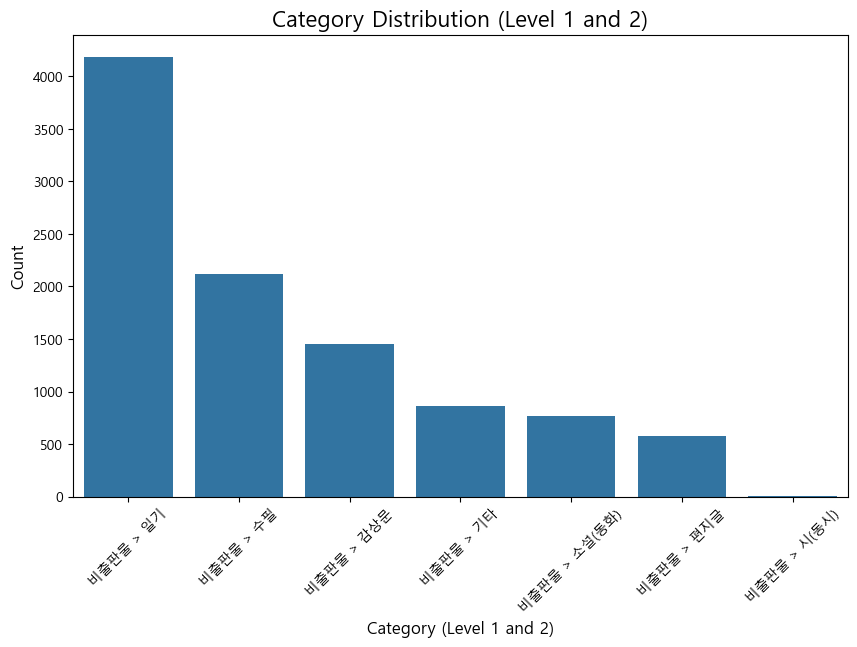

In [49]:
df_merged['category_level'] = df_merged['category'].apply(
    lambda x: ' > '.join([part.strip() for part in x.split('>')[:2]])
)
# category_level 별로 데이터 개수 세기
category_counts = df_merged['category_level'].value_counts()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
sns.barplot(x=category_counts.index, y=category_counts.values)

# 그래프에 제목과 레이블 추가
plt.title('Category Distribution (Level 1 and 2)', fontsize=16)
plt.xlabel('Category (Level 1 and 2)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # x축 레이블 회전 (가독성 향상)

# 그래프 보여주기
plt.show()

연령대별 데이터 개수:
0~9      2077
10~19    3826
20~29    2903
30~39     454
40~49     143
50~59     166
60~69     333
70~79      69
80~89       4
Name: age_group, dtype: int64


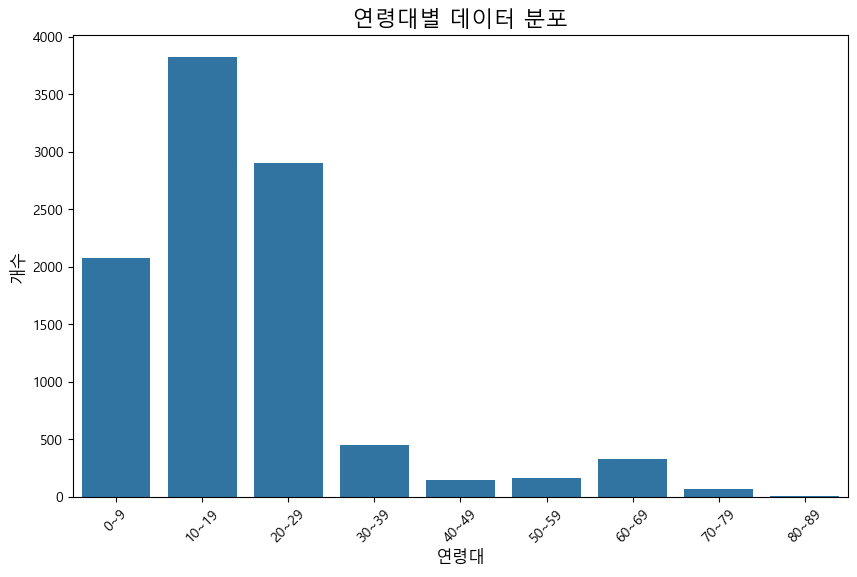

In [52]:
# author_age를 정수형으로 변환 (혹시 문자열이면)
df_merged['author_age'] = df_merged['author_age'].astype(int)

# 10살 단위로 구간 나누기
df_merged['age_group'] = df_merged['author_age'].apply(lambda x: f"{(x // 10) * 10}~{(x // 10) * 10 + 9}")

# 연령대별 개수 세기
age_group_counts = df_merged['age_group'].value_counts().sort_index()  # 순서 정렬

# 4. 개수 출력
print("연령대별 데이터 개수:")
print(age_group_counts)

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('연령대별 데이터 분포', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('개수', fontsize=12)
plt.xticks(rotation=45)
plt.show()

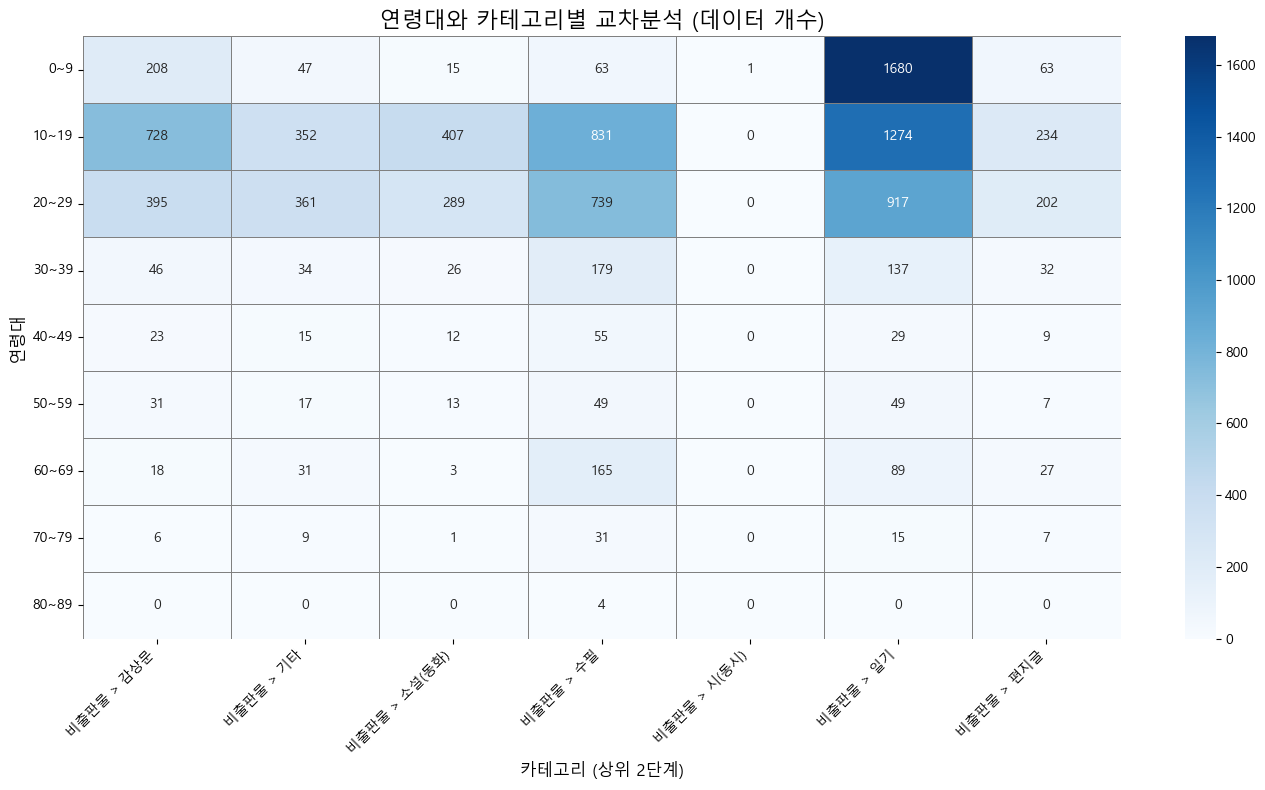

In [53]:
# 교차표 생성
cross_tab = pd.crosstab(df_merged['age_group'], df_merged['category_level'])

# 시각화
plt.figure(figsize=(14, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=0.5, linecolor='gray')

plt.title('연령대와 카테고리별 교차분석 (데이터 개수)', fontsize=16)
plt.xlabel('카테고리 (상위 2단계)', fontsize=12)
plt.ylabel('연령대', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [54]:
# author_age를 int로 변환 (혹시 안 되어 있다면)
df_merged['author_age'] = df_merged['author_age'].astype(int)

# 조건에 맞는 행 필터링
filtered_df = df_merged[
    (df_merged['category_level'] == '비출판물 > 일기') &
    (df_merged['author_age'] >= 40) &
    (df_merged['author_age'] <= 79)
]

# 결과 저장
filtered_df.to_csv('filtered_diary_4079.csv', index=False)

# 확인용 출력
print(f"필터링된 데이터 수: {len(filtered_df)}개")
print(filtered_df.head())


필터링된 데이터 수: 182개
    author_id                       title  \
29     P00037                      58년 개띠   
49     P00075                  아이를 키우며...   
67     P00090  아들과 함계 읽는 책 -세계를 건너 너에게 갈께   
119    P00159                      무료한 일상   
130    P00171                      새벽의 느낌   

                                              sentence         file_id  \
29   살 다 보니 어느 새 현역에서 은퇴하여 손주를 보며 즐거워하는 나이가 되었다. 지난...  WDRW1900100037   
49   담임 교사로부터 전화를 받았다. 그런 걱정을 해보지 않은 것은 아니나, 막상 이런 ...  WDRW1900100075   
67   초등학교 방학이 시작되고 끝났다.\n맞벌이 엄마인 나로써는 방학은 항상 해결하기 힘...  WDRW1900100090   
119  취업을 하면 뭔가 꽃길을 걸을 줄 알았다. 그래서 열심히 공부하고 또 공부하고 해서...  WDRW1900100159   
130  강아지가 얼굴을 핥는다. 눈을 떠 보니 아직 어둡고 고개를 돌려 시계를 보니 새벽 ...  WDRW1900100171   

    anno_level   category  author_age author_occupation author_sex  \
29          원시  비출판물 > 일기          61              전업주부          M   
49          원시  비출판물 > 일기          55              전업주부          F   
67          원시  비출판물 > 일기          43           직장인/전문직  

In [58]:
# 필요한 열만 선택
selected_columns = filtered_df[['author_id', 'title', 'sentence', 'author_age']]

# CSV 파일로 저장
selected_columns.to_csv('preproc_4079_diary.csv', index=False)

# 저장 확인용 출력
print(f"저장된 데이터 수: {len(selected_columns)}개")
print(selected_columns.head())

저장된 데이터 수: 182개
    author_id                       title  \
29     P00037                      58년 개띠   
49     P00075                  아이를 키우며...   
67     P00090  아들과 함계 읽는 책 -세계를 건너 너에게 갈께   
119    P00159                      무료한 일상   
130    P00171                      새벽의 느낌   

                                              sentence  author_age  
29   살 다 보니 어느 새 현역에서 은퇴하여 손주를 보며 즐거워하는 나이가 되었다. 지난...          61  
49   담임 교사로부터 전화를 받았다. 그런 걱정을 해보지 않은 것은 아니나, 막상 이런 ...          55  
67   초등학교 방학이 시작되고 끝났다.\n맞벌이 엄마인 나로써는 방학은 항상 해결하기 힘...          43  
119  취업을 하면 뭔가 꽃길을 걸을 줄 알았다. 그래서 열심히 공부하고 또 공부하고 해서...          40  
130  강아지가 얼굴을 핥는다. 눈을 떠 보니 아직 어둡고 고개를 돌려 시계를 보니 새벽 ...          40  
